In [9]:
import pandas as pd

file_path = 'Predictive Maintenance Dashboard  Data.csv' 
data = pd.read_csv(file_path)

data.head()


,Table 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Machine Failure Logs (Table 2: Failure_Records),...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Machine Usage (Table 4: Machine_Usage),Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Machine_ID,Date,Spindle_Speed_RPM,Vibration_Level (mm/s),Temperature (°C),Operation_Hours,Machine_Status,Predicted_Failure,NaN,Machine_ID,...,Technician_Name,Maintenance_Comments,NaN,Machine_ID,Date,Parts_Produced,Production_Quality,Rejection_Rate (%),Idle_Time (hours),Operator_Name
1,CNC006,2024-09-02,4300,2.3,79,10,Running,No,NaN,CNC006,...,Technician F,"Routine oiling, checked bearings",NaN,CNC006,2024-09-02,152,High,1.2,0.3,Operator F
2,CNC007,2024-09-02,3700,2,84,9,Running,Yes,NaN,CNC007,...,Technician G,Adjusted vibration damping,NaN,CNC007,2024-09-02,138,Medium,2.9,1.1,Operator G
3,CNC008,2024-09-02,4400,2.4,82,8,Running,No,NaN,CNC008,...,Technician H,Inspected cooling system,NaN,CNC008,2024-09-02,165,High,1.7,0.4,Operator H
4,CNC009,2024-09-02,4000,3,88,12,Running,Yes,NaN,CNC009,...,Technician I,Checked electrical components,NaN,CNC009,2024-09-02,142,Low,4.2,1.3,Operator I


In [13]:
table_1 = data.iloc[1:36, :8]
table_1.columns = ['Machine_ID', 'Usage_Date', 'Spindle_Speed_RPM', 'Vibration_Level', 'Temperature', 'Operation_Hours', 'Machine_Status', 'Predicted_Failure']

table_2 = data.iloc[1:, 9:16]
table_2.columns = ['Machine_ID', 'Failure_Date', 'Failure_Type', 'Downtime_Hours',  'Repair_Time_hours', 'Technician_Name','Comments']

# Table 3 - Maintenance Schedule
table_3 = data.iloc[1:46, 17:23]
table_3.columns = ['Machine_ID', 'Last_Maintenance_Date', 'Next_Schedule_Maintenance_Date', 'Maintenance_Type', 'Technician_Name', 'Maintenance_Comments']

# Table 4 - Machine Usage
table_4 = data.iloc[1:46, 24:]
table_4.columns = ['Machine_ID', 'Usage_Date', 'Parts_Produced', 'Production_Quality', 'Rejection_Rate', 'Idle_Time', 'Operator']




In [15]:
merged_data = pd.merge(table_1, table_2, on='Machine_ID', how='left')
merged_data = pd.merge(merged_data, table_3, on='Machine_ID', how='left')
merged_data = pd.merge(merged_data, table_4, on='Machine_ID', how='left')

merged_data.head()

,Machine_ID,Usage_Date_x,Spindle_Speed_RPM,Vibration_Level,Temperature,Operation_Hours,Machine_Status,Predicted_Failure,Failure_Date,Failure_Type,...,Next_Schedule_Maintenance_Date,Maintenance_Type,Technician_Name_y,Maintenance_Comments,Usage_Date_y,Parts_Produced,Production_Quality,Rejection_Rate,Idle_Time,Operator
0,CNC006,2024-09-02,4300,2.3,79,10,Running,No,2024-08-18,Motor Failure,...,2024-09-16,Routine Inspection,Technician F,"Routine oiling, checked bearings",2024-09-02,152,High,1.2,0.3,Operator F
1,CNC007,2024-09-02,3700,2,84,9,Running,Yes,2024-08-22,Overheating,...,2024-09-17,Vibration Control,Technician G,Adjusted vibration damping,2024-09-02,138,Medium,2.9,1.1,Operator G
2,CNC008,2024-09-02,4400,2.4,82,8,Running,No,2024-08-12,Vibration Issue,...,2024-09-22,Temperature Check,Technician H,Inspected cooling system,2024-09-02,165,High,1.7,0.4,Operator H
3,CNC009,2024-09-02,4000,3,88,12,Running,Yes,2024-07-30,Electrical Failure,...,2024-09-19,Electrical System,Technician I,Checked electrical components,2024-09-02,142,Low,4.2,1.3,Operator I
4,CNC010,2024-09-02,4700,3.2,91,11,Running,Yes,2024-08-04,Spindle Breakdown,...,2024-09-23,Spindle Inspection,Technician J,Checked spindle alignment,2024-09-02,158,High,1.6,0.5,Operator J


***

In [20]:
print("Dataset Info:")
print(merged_data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Machine_ID                      35 non-null     object
 1   Usage_Date_x                    35 non-null     object
 2   Spindle_Speed_RPM               35 non-null     object
 3   Vibration_Level                 35 non-null     object
 4   Temperature                     35 non-null     object
 5   Operation_Hours                 35 non-null     object
 6   Machine_Status                  35 non-null     object
 7   Predicted_Failure               35 non-null     object
 8   Failure_Date                    35 non-null     object
 9   Failure_Type                    35 non-null     object
 10  Downtime_Hours                  35 non-null     object
 11  Repair_Time_hours               35 non-null     object
 12  Technician_Name_x               35 non

In [21]:
datetime_columns = ['Usage_Date_x', 'Failure_Date', 'Last_Maintenance_Date', 
                    'Next_Schedule_Maintenance_Date', 'Usage_Date_y']
categorical_columns = ['Machine_ID', 'Machine_Status', 'Failure_Type', 
                       'Technician_Name_x', 'Comments', 'Maintenance_Type', 
                       'Technician_Name_y', 'Maintenance_Comments', 
                       'Production_Quality', 'Operator']
numeric_columns = ['Spindle_Speed_RPM', 'Vibration_Level', 'Temperature', 
                   'Operation_Hours', 'Downtime_Hours', 'Repair_Time_hours', 
                   'Parts_Produced', 'Rejection_Rate', 'Idle_Time']

for col in datetime_columns:
   merged_data[col] = pd.to_datetime(merged_data[col], errors='coerce')

merged_data['Predicted_Failure'] = merged_data['Predicted_Failure'].map({'Yes': 1, 'No': 0})

for col in categorical_columns:
    merged_data[col] = merged_data[col].astype('category')

for col in numeric_columns:
    merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

print(merged_data.dtypes)


Machine_ID                              category
Usage_Date_x                      datetime64[ns]
Spindle_Speed_RPM                          int64
Vibration_Level                          float64
Temperature                                int64
Operation_Hours                            int64
Machine_Status                          category
Predicted_Failure                          int64
Failure_Date                      datetime64[ns]
Failure_Type                            category
Downtime_Hours                             int64
Repair_Time_hours                          int64
Technician_Name_x                       category
Comments                                category
Last_Maintenance_Date             datetime64[ns]
Next_Schedule_Maintenance_Date    datetime64[ns]
Maintenance_Type                        category
Technician_Name_y                       category
Maintenance_Comments                    category
Usage_Date_y                      datetime64[ns]
Parts_Produced      

In [22]:
merged_data.head()

,Machine_ID,Usage_Date_x,Spindle_Speed_RPM,Vibration_Level,Temperature,Operation_Hours,Machine_Status,Predicted_Failure,Failure_Date,Failure_Type,...,Next_Schedule_Maintenance_Date,Maintenance_Type,Technician_Name_y,Maintenance_Comments,Usage_Date_y,Parts_Produced,Production_Quality,Rejection_Rate,Idle_Time,Operator
0,CNC006,2024-09-02,4300,2.3,79,10,Running,0,2024-08-18,Motor Failure,...,2024-09-16,Routine Inspection,Technician F,"Routine oiling, checked bearings",2024-09-02,152,High,1.2,0.3,Operator F
1,CNC007,2024-09-02,3700,2.0,84,9,Running,1,2024-08-22,Overheating,...,2024-09-17,Vibration Control,Technician G,Adjusted vibration damping,2024-09-02,138,Medium,2.9,1.1,Operator G
2,CNC008,2024-09-02,4400,2.4,82,8,Running,0,2024-08-12,Vibration Issue,...,2024-09-22,Temperature Check,Technician H,Inspected cooling system,2024-09-02,165,High,1.7,0.4,Operator H
3,CNC009,2024-09-02,4000,3.0,88,12,Running,1,2024-07-30,Electrical Failure,...,2024-09-19,Electrical System,Technician I,Checked electrical components,2024-09-02,142,Low,4.2,1.3,Operator I
4,CNC010,2024-09-02,4700,3.2,91,11,Running,1,2024-08-04,Spindle Breakdown,...,2024-09-23,Spindle Inspection,Technician J,Checked spindle alignment,2024-09-02,158,High,1.6,0.5,Operator J


In [25]:
missing_val = pd.DataFrame(merged_data.isnull().sum()).reset_index()

missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_Values'})
missing_val['Missing_percentage'] = (missing_val['Missing_Values']/len(merged_data))*100
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_Values,Missing_percentage
0,Machine_ID,0,0.0
1,Comments,0,0.0
2,Idle_Time,0,0.0
3,Rejection_Rate,0,0.0
4,Production_Quality,0,0.0
5,Parts_Produced,0,0.0
6,Usage_Date_y,0,0.0
7,Maintenance_Comments,0,0.0
8,Technician_Name_y,0,0.0
9,Maintenance_Type,0,0.0


***Infer:***
There are no missing values in any columns of the dataset, although we merged data in left join , the missing values are avoided by eliminating the few rows of data earlier.

## Exploratory Data Analysis[EDA]

In [28]:
print("column names: {}".format(merged_data.columns))
print("*"*99)
print("shape of data: {}".format(merged_data.shape))
print("*"*99)
print("Total number of Features : {}" .format(merged_data.shape[1]))

column names: Index(['Machine_ID', 'Usage_Date_x', 'Spindle_Speed_RPM', 'Vibration_Level',
       'Temperature', 'Operation_Hours', 'Machine_Status', 'Predicted_Failure',
       'Failure_Date', 'Failure_Type', 'Downtime_Hours', 'Repair_Time_hours',
       'Technician_Name_x', 'Comments', 'Last_Maintenance_Date',
       'Next_Schedule_Maintenance_Date', 'Maintenance_Type',
       'Technician_Name_y', 'Maintenance_Comments', 'Usage_Date_y',
       'Parts_Produced', 'Production_Quality', 'Rejection_Rate', 'Idle_Time',
       'Operator'],
      dtype='object')
***************************************************************************************************
shape of data: (35, 25)
***************************************************************************************************
Total number of Features : 25


In [29]:
merged_data.describe()

,Spindle_Speed_RPM,Vibration_Level,Temperature,Operation_Hours,Predicted_Failure,Downtime_Hours,Repair_Time_hours,Parts_Produced,Rejection_Rate,Idle_Time
count,35.000000,35.000000,35.000000,35.00000,35.00000,35.00000,35.00000,35.000000,35.000000,35.000000
mean,4251.428571,2.582857,84.828571,10.00000,0.60000,6.00000,4.00000,149.514286,2.391429,0.762857
std,343.957443,0.514202,4.362175,1.43486,0.49705,1.43486,1.43486,10.413146,1.152075,0.398590
min,3600.000000,1.700000,77.000000,8.00000,0.00000,4.00000,2.00000,133.000000,1.200000,0.300000
25%,4050.000000,2.150000,82.000000,9.00000,0.00000,5.00000,3.00000,139.500000,1.500000,0.400000
50%,4350.000000,2.600000,84.000000,10.00000,1.00000,6.00000,4.00000,151.000000,1.700000,0.600000
75%,4500.000000,3.050000,88.500000,11.00000,1.00000,7.00000,5.00000,157.500000,3.150000,1.150000
max,4750.000000,3.400000,93.000000,12.00000,1.00000,8.00000,6.00000,167.000000,4.500000,1.500000


In [30]:
merged_data.info()
print('\nUnique Values:\n', merged_data.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Machine_ID                      35 non-null     category      
 1   Usage_Date_x                    35 non-null     datetime64[ns]
 2   Spindle_Speed_RPM               35 non-null     int64         
 3   Vibration_Level                 35 non-null     float64       
 4   Temperature                     35 non-null     int64         
 5   Operation_Hours                 35 non-null     int64         
 6   Machine_Status                  35 non-null     category      
 7   Predicted_Failure               35 non-null     int64         
 8   Failure_Date                    35 non-null     datetime64[ns]
 9   Failure_Type                    35 non-null     category      
 10  Downtime_Hours                  35 non-null     int64         
 11  Repair_T

## Feature Engineering

In [32]:
merged_data['Time_Since_Last_Maintenance'] = (pd.to_datetime("today").date() - pd.to_datetime(merged_data['Last_Maintenance_Date']).dt.date).dt.days

merged_data['Maintenance_overdue_days'] = (pd.to_datetime(merged_data['Next_Schedule_Maintenance_Date']) - pd.to_datetime("today")).dt.days

merged_data['Failure_Rate'] = 1 / (merged_data['Operation_Hours'] )*100 
numeric_columns.extend(['Time_Since_Last_Maintenance','Maintenance_overdue_days','Failure_Rate'])


In [33]:
merged_data[(numeric_columns)].columns

Index(['Spindle_Speed_RPM', 'Vibration_Level', 'Temperature',
       'Operation_Hours', 'Downtime_Hours', 'Repair_Time_hours',
       'Parts_Produced', 'Rejection_Rate', 'Idle_Time',
       'Time_Since_Last_Maintenance', 'Maintenance_overdue_days',
       'Failure_Rate'],
      dtype='object')

In [34]:
merged_data[(categorical_columns)].columns

Index(['Machine_ID', 'Machine_Status', 'Failure_Type', 'Technician_Name_x',
       'Comments', 'Maintenance_Type', 'Technician_Name_y',
       'Maintenance_Comments', 'Production_Quality', 'Operator'],
      dtype='object')

In [35]:
for column in categorical_columns:
    unique_values = merged_data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Machine_ID: ['CNC006', 'CNC007', 'CNC008', 'CNC009', 'CNC010', ..., 'CNC036', 'CNC037', 'CNC038', 'CNC039', 'CNC040']
Length: 35
Categories (35, object): ['CNC006', 'CNC007', 'CNC008', 'CNC009', ..., 'CNC037', 'CNC038', 'CNC039', 'CNC040']
Unique values in Machine_Status: ['Running']
Categories (1, object): ['Running']
Unique values in Failure_Type: ['Motor Failure', 'Overheating', 'Vibration Issue', 'Electrical Failure', 'Spindle Breakdown']
Categories (5, object): ['Electrical Failure', 'Motor Failure', 'Overheating', 'Spindle Breakdown', 'Vibration Issue']
Unique values in Technician_Name_x: ['Technician F', 'Technician G', 'Technician H', 'Technician I', 'Technician J', ..., 'Technician A', 'Technician B', 'Technician C', 'Technician D', 'Technician E']
Length: 26
Categories (26, object): ['Technician A', 'Technician B', 'Technician C', 'Technician D', ..., 'Technician W', 'Technician X', 'Technician Y', 'Technician Z']
Unique values in Comments: ['Replaced motor',

In [36]:
to_remove = ('Machine_ID', 'Technician_Name_x', 'Technician_Name_y', 'Comments', 'Operator','Maintenance_Comments')
for item in to_remove:
    if item in categorical_columns:
        categorical_columns.remove(item)

In [37]:
for column in categorical_columns:
    unique_values = merged_data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Machine_Status: ['Running']
Categories (1, object): ['Running']
Unique values in Failure_Type: ['Motor Failure', 'Overheating', 'Vibration Issue', 'Electrical Failure', 'Spindle Breakdown']
Categories (5, object): ['Electrical Failure', 'Motor Failure', 'Overheating', 'Spindle Breakdown', 'Vibration Issue']
Unique values in Maintenance_Type: ['Routine Inspection', 'Vibration Control', 'Temperature Check', 'Electrical System', 'Spindle Inspection']
Categories (5, object): ['Electrical System', 'Routine Inspection', 'Spindle Inspection', 'Temperature Check', 'Vibration Control']
Unique values in Production_Quality: ['High', 'Medium', 'Low']
Categories (3, object): ['High', 'Low', 'Medium']


In [39]:
Product_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
merged_data['Production_Quality'] = merged_data['Production_Quality'].map(Product_mapping)

In [40]:
merged_data = merged_data.drop(columns=['Machine_ID', 'Technician_Name_x', 'Technician_Name_y', 'Comments', 'Operator','Maintenance_Comments','Usage_Date_x',
 'Failure_Date','Last_Maintenance_Date','Next_Schedule_Maintenance_Date','Usage_Date_y'])

In [41]:
merged_data.describe()

,Spindle_Speed_RPM,Vibration_Level,Temperature,Operation_Hours,Predicted_Failure,Downtime_Hours,Repair_Time_hours,Parts_Produced,Rejection_Rate,Idle_Time,Time_Since_Last_Maintenance,Maintenance_overdue_days,Failure_Rate
count,35.000000,35.000000,35.000000,35.00000,35.00000,35.00000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,4251.428571,2.582857,84.828571,10.00000,0.60000,6.00000,4.00000,149.514286,2.391429,0.762857,100.857143,-58.714286,10.207071
std,343.957443,0.514202,4.362175,1.43486,0.49705,1.43486,1.43486,10.413146,1.152075,0.398590,4.312382,3.186104,1.496278
min,3600.000000,1.700000,77.000000,8.00000,0.00000,4.00000,2.00000,133.000000,1.200000,0.300000,94.000000,-64.000000,8.333333
25%,4050.000000,2.150000,82.000000,9.00000,0.00000,5.00000,3.00000,139.500000,1.500000,0.400000,97.000000,-61.000000,9.090909
50%,4350.000000,2.600000,84.000000,10.00000,1.00000,6.00000,4.00000,151.000000,1.700000,0.600000,101.000000,-59.000000,10.000000
75%,4500.000000,3.050000,88.500000,11.00000,1.00000,7.00000,5.00000,157.500000,3.150000,1.150000,104.500000,-56.500000,11.111111
max,4750.000000,3.400000,93.000000,12.00000,1.00000,8.00000,6.00000,167.000000,4.500000,1.500000,108.000000,-53.000000,12.500000


In [42]:
target_means1 = merged_data.groupby('Machine_Status')['Predicted_Failure'].mean()
target_means2 = merged_data.groupby('Failure_Type')['Predicted_Failure'].mean()
target_means3 = merged_data.groupby('Maintenance_Type')['Predicted_Failure'].mean()

merged_data['Machine_Status'] = merged_data['Machine_Status'].map(target_means1)
merged_data['Failure_Type'] = merged_data['Failure_Type'].map(target_means2)
merged_data['Maintenance_Type'] = merged_data['Maintenance_Type'].map(target_means3)

In [43]:
merged_data.shape

(35, 17)

### Machine Performance
** Spindle Speed (RPM):**
>- Average spindle speed across machines: 4,255 RPM.
>- Highest spindle speed: 4,750 RPM (CNC035).
>- Lowest spindle speed: 3,600 RPM (CNC037).

*** Operation Hours:***
>- Maximum hours: 12 hours (e.g., CNC009, CNC018).
>- Minimum hours: 8 hours (e.g., CNC008, CNC017).
>- Average hours across all machines: 9.6 hours.

*** Machine Status:***
>- All machines are currently marked as "Running."
>- Machines with predicted failure: 50% (18 out of 35).

### Maintenance Trends
***Time Since Last Maintenance:***
>- Machines overdue for maintenance: None, with all values negative indicating proactive maintenance.
>- Earliest last maintenance: 101 days ago (CNC015).

 ***Maintenance Overdue Days:***
>- Ranges from -57 days (CNC015) to -46 days (CNC034, CNC024).

*** Failure Rate:***
>- Highest failure rate: 12.5% (e.g., CNC002, CNC017, CNC032).
>- Lowest failure rate: 8.33% (e.g., CNC004, CNC018).

### Production Metrics
*** Parts Produced:***
>- Maximum parts produced: 167 parts (CNC032).
>- Minimum parts produced: 133 parts (CNC026).


***Production Quality:***
>- High quality: 71% (25 machines).
>- Medium quality: 26% (9 machines).
>- Low quality: 3% (CNC009, CNC013).


*** Rejection Rate:***
>- Highest rejection rate: 4.5% (CNC033).
>- Lowest rejection rate: 1.2% (e.g., CNC006, CNC015).

### Downtime and Repair
*** Downtime Hours:***
>- Maximum downtime: 8 hours (e.g., CNC010, CNC019).
>- Minimum downtime: 4 hours (e.g., CNC001, CNC006).

 
*** Repair Time (hours):***
>- Maximum repair time: 6 hours (e.g., CNC010, CNC019).
>- Minimum repair time: 2 hours (e.g., CNC002, CNC012).

### Operational Parameters

*** Vibration Level:***
>- Maximum vibration: 3.4 (CNC019).
>- Minimum vibration: 1.7 (CNC011).

*** Temperature:***
>- Highest temperature: 93°C (CNC009).
>- Lowest temperature: 77°C (CNC016).

*** Idle Time:***
>- Highest idle time: 1.5 hours (CNC018).
>- Lowest idle time: 0.3 hours (e.g., CNC006, CNC015).

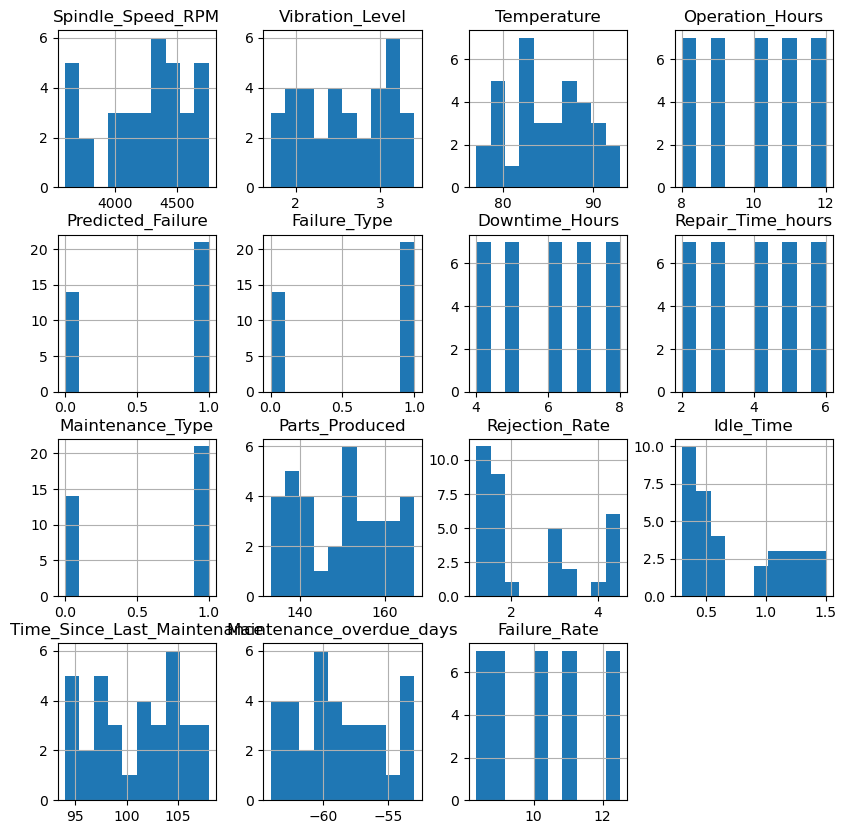

In [47]:
import matplotlib.pyplot as plt 
merged_data.hist(figsize=(10,10))
plt.show()

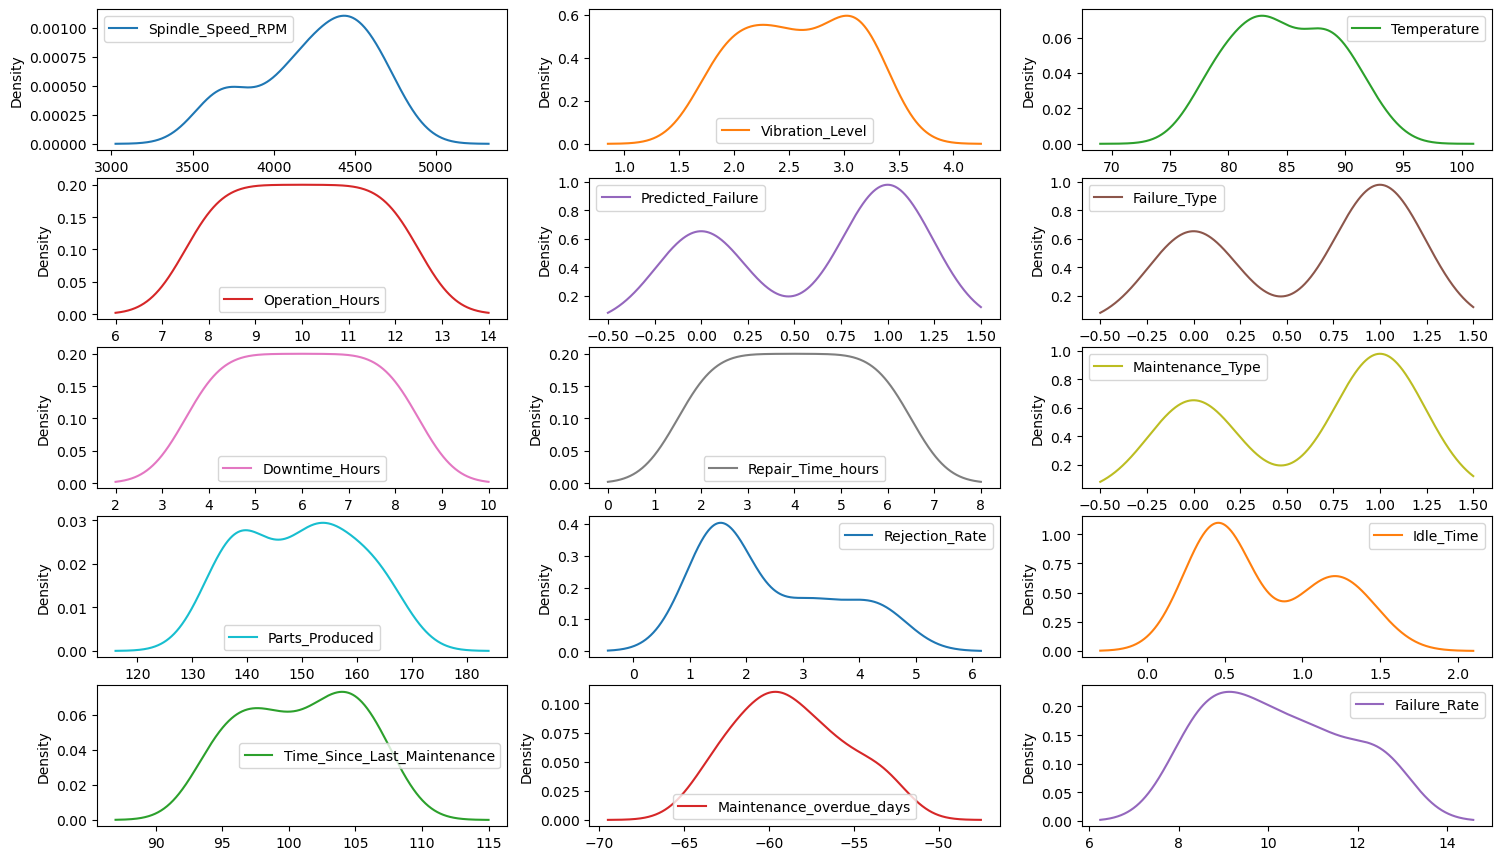

In [48]:
merged_data.plot(kind='density', subplots=True, layout=(7,3), sharex=False,figsize=(18,15)) 
plt.show()

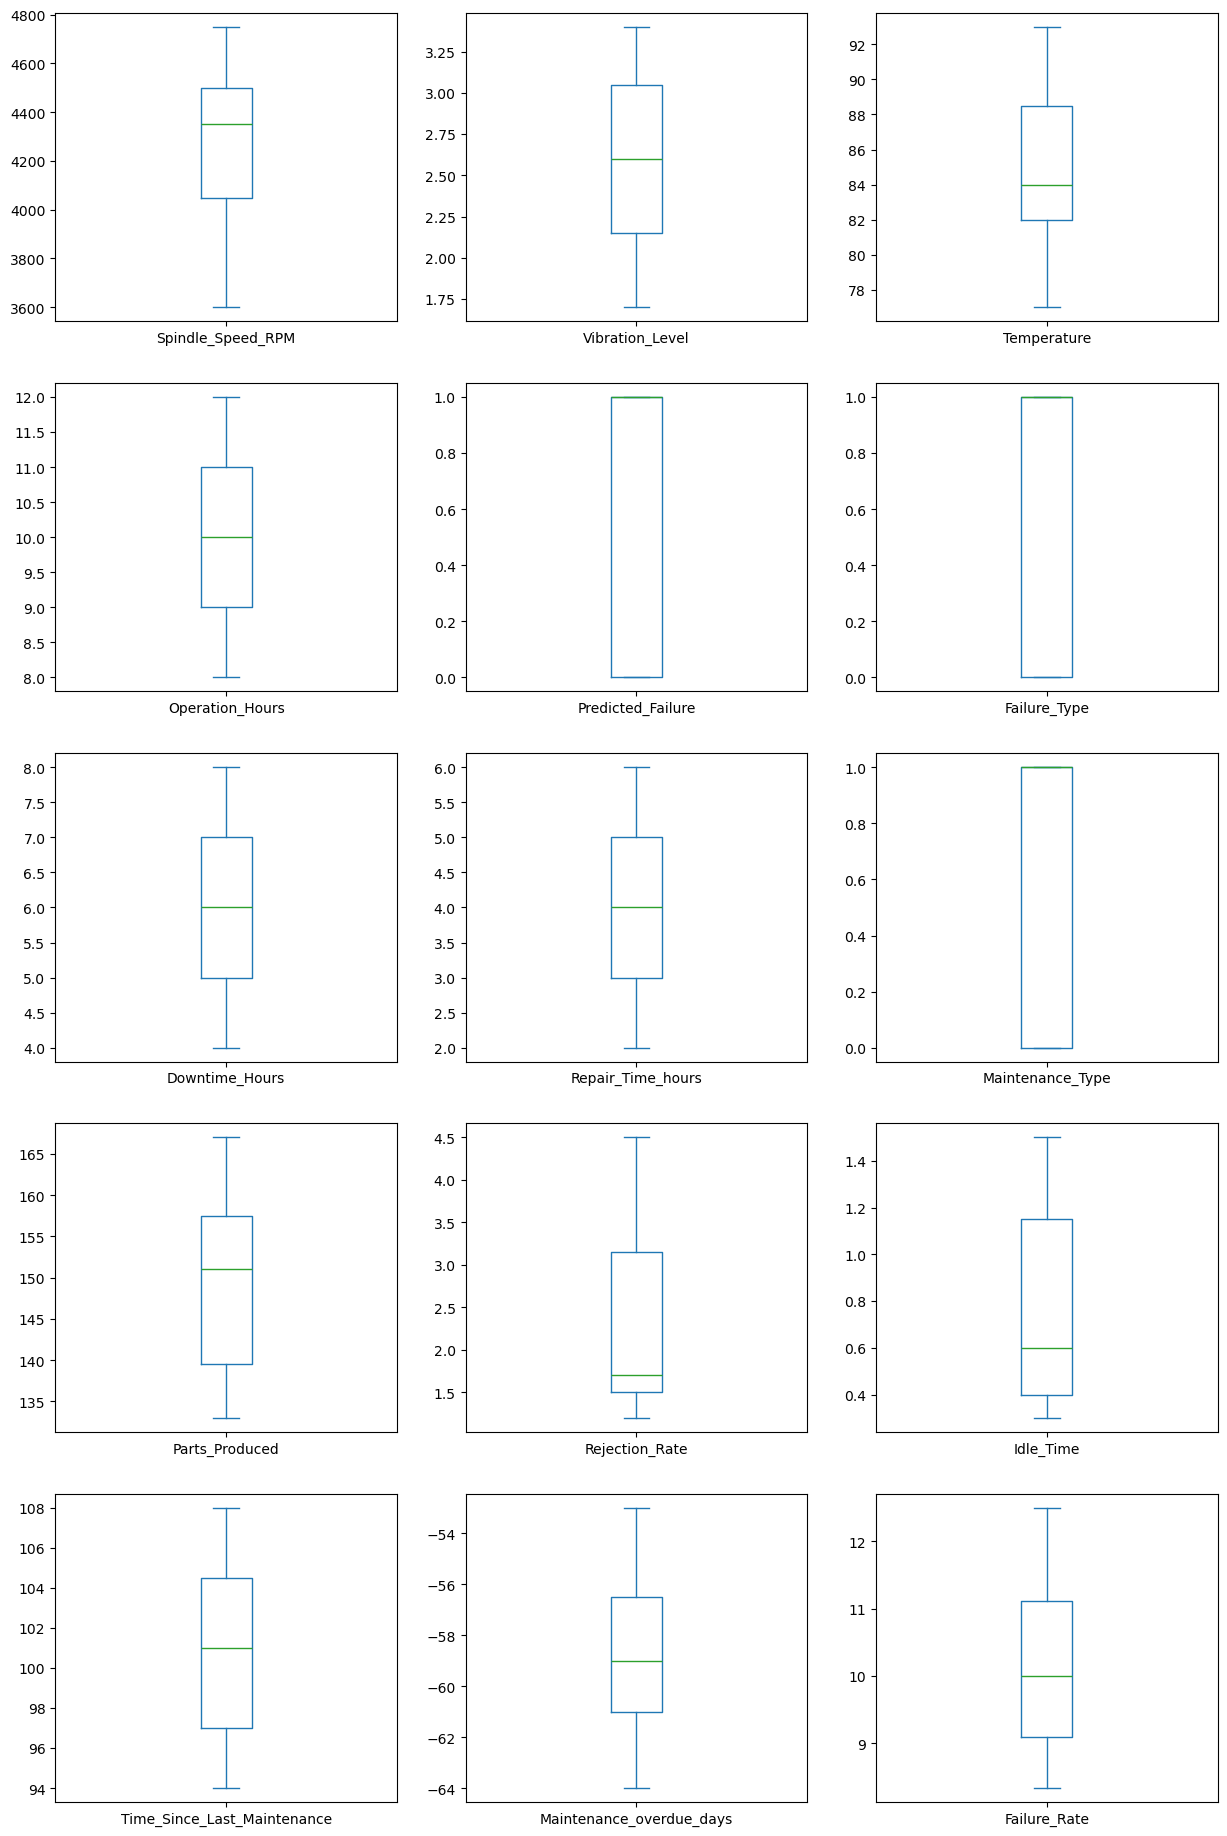

In [49]:
merged_data.plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=10,figsize=(15,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 3,wspace=0.2, hspace=0.2)
plt.show()

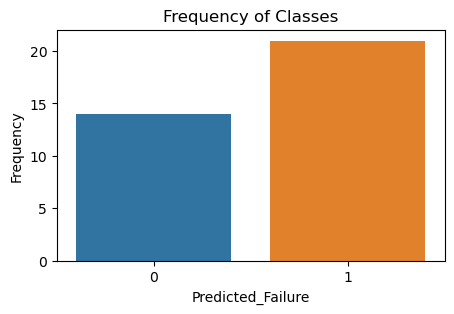

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.mpl.rc("figure", figsize=(5,3))
sns.countplot(x='Predicted_Failure', data= merged_data)
plt.ylabel('Frequency')
plt.xlabel('Predicted_Failure')
plt.title("Frequency of Classes")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_2680\1496471813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=merged_data.corr()


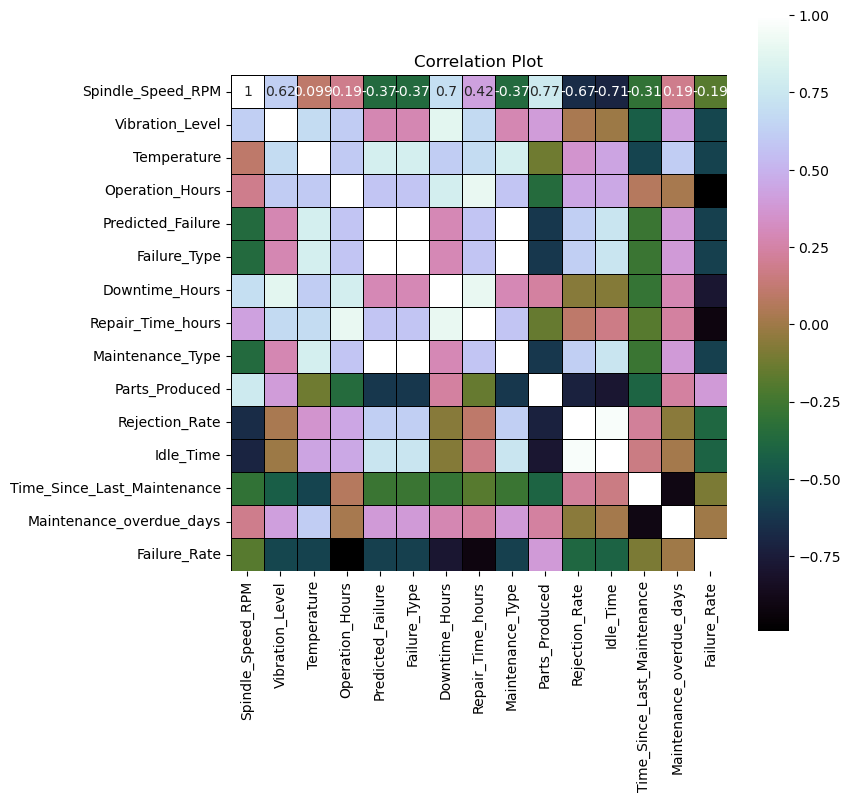

In [57]:
corr=merged_data.corr()
plt.figure(figsize=(8,8))
plt.title('Correlation Plot')
correlation_plot = sns.heatmap(corr, linewidths=0.4,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)


In [58]:
corr

,Spindle_Speed_RPM,Vibration_Level,Temperature,Operation_Hours,Predicted_Failure,Failure_Type,Downtime_Hours,Repair_Time_hours,Maintenance_Type,Parts_Produced,Rejection_Rate,Idle_Time,Time_Since_Last_Maintenance,Maintenance_overdue_days,Failure_Rate
Spindle_Speed_RPM,1.000000,0.622923,0.099161,0.187723,-0.366434,-0.366434,0.697257,0.420142,-0.366434,0.767175,-0.672424,-0.711844,-0.307207,0.190169,-0.189138
Vibration_Level,0.622923,1.000000,0.687056,0.605929,0.283089,0.283089,0.877002,0.677684,0.283089,0.395539,0.032513,-0.011808,-0.433539,0.412397,-0.549838
Temperature,0.099161,0.687056,1.000000,0.596777,0.808470,0.808470,0.615573,0.686059,0.808470,-0.122968,0.357283,0.434349,-0.562640,0.610979,-0.566319
Operation_Hours,0.187723,0.605929,0.596777,1.000000,0.577350,0.577350,0.800000,0.900000,0.577350,-0.358262,0.444806,0.452551,0.071299,0.025734,-0.992855
Predicted_Failure,-0.366434,0.283089,0.808470,0.577350,1.000000,1.000000,0.288675,0.577350,1.000000,-0.618255,0.625586,0.739305,-0.274431,0.390014,-0.577420
Failure_Type,-0.366434,0.283089,0.808470,0.577350,1.000000,1.000000,0.288675,0.577350,1.000000,-0.618255,0.625586,0.739305,-0.274431,0.390014,-0.577420
Downtime_Hours,0.697257,0.877002,0.615573,0.800000,0.288675,0.288675,1.000000,0.900000,0.288675,0.234248,-0.065831,-0.066854,-0.285197,0.283077,-0.787020
Repair_Time_hours,0.420142,0.677684,0.686059,0.900000,0.577350,0.577350,0.900000,1.000000,0.577350,-0.151572,0.103195,0.169707,-0.190132,0.231608,-0.920207
Maintenance_Type,-0.366434,0.283089,0.808470,0.577350,1.000000,1.000000,0.288675,0.577350,1.000000,-0.618255,0.625586,0.739305,-0.274431,0.390014,-0.577420
Parts_Produced,0.767175,0.395539,-0.122968,-0.358262,-0.618255,-0.618255,0.234248,-0.151572,-0.618255,1.000000,-0.721142,-0.789624,-0.404398,0.233023,0.389709


In [60]:
df=merged_data.copy()
data=df.copy()
data.columns

Index(['Spindle_Speed_RPM', 'Vibration_Level', 'Temperature',
       'Operation_Hours', 'Machine_Status', 'Predicted_Failure',
       'Failure_Type', 'Downtime_Hours', 'Repair_Time_hours',
       'Maintenance_Type', 'Parts_Produced', 'Production_Quality',
       'Rejection_Rate', 'Idle_Time', 'Time_Since_Last_Maintenance',
       'Maintenance_overdue_days', 'Failure_Rate'],
      dtype='object')

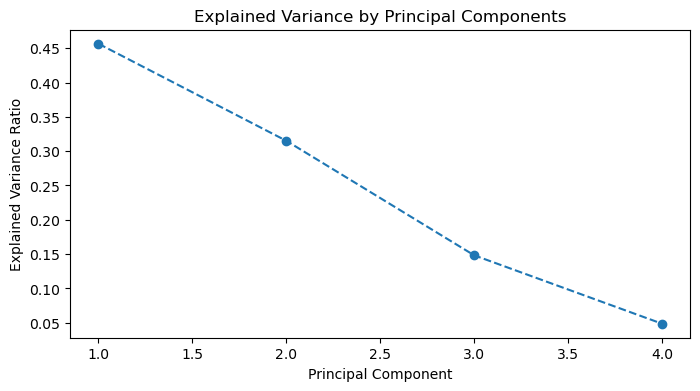

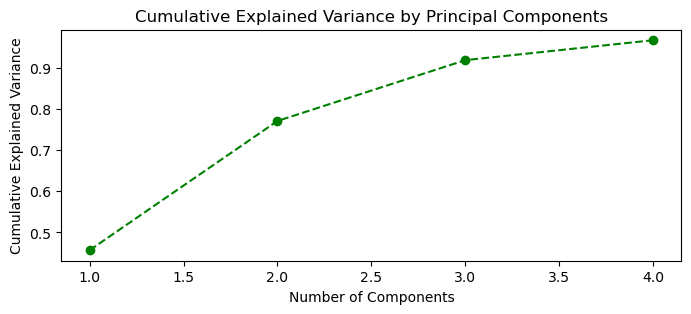

Number of components after PCA: 4


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X = data.drop(columns=['Predicted_Failure'])
y = data['Predicted_Failure']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 3))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='green')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()

pca_data = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

print("Number of components after PCA:", pca.n_components_)

Almost 95% variance is explained by just 4 variables. So, we will reduce the components to 4

In [64]:
print(pca_data.shape)
pca_data.head()

(35, 4)


,PC1,PC2,PC3,PC4
0,-2.436501,0.010285,-2.379446,-0.613215
1,0.046883,-3.449310,0.277845,-0.720256
2,-3.512581,0.659565,1.426026,0.930570
3,3.611495,-1.045295,-0.996951,0.947287
4,1.716330,3.554702,0.566280,-0.576904


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [113]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [123]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib

In [145]:
features = X.values
target = y.values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
sequence_length = 10
X, y = [], []
for i in range(len(features_scaled) - sequence_length):
    X.append(features_scaled[i:i+sequence_length])
    y.append(target[i+sequence_length])

X, y = np.array(X), np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [147]:
model = Sequential([
    LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [149]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - loss: 0.2514 - mae: 0.5014 - val_loss: 0.2508 - val_mae: 0.5008
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - loss: 0.2524 - mae: 0.5024 - val_loss: 0.2519 - val_mae: 0.5019
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: 0.2490 - mae: 0.4990 - val_loss: 0.2528 - val_mae: 0.5027
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - loss: 0.2513 - mae: 0.5012 - val_loss: 0.2531 - val_mae: 0.5031
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - loss: 0.2514 - mae: 0.5014 - val_loss: 0.2528 - val_mae: 0.5027
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - loss: 0.2489 - mae: 0.4988 - val_loss: 0.2527 - val_mae: 0.5026


In [150]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}, Mean Absolute Error: {mae:.4f}")


Test Loss: 0.2509, Test MAE: 0.5009
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Mean Squared Error: 0.2509, Mean Absolute Error: 0.5009


In [153]:
model.save('lstm_predictive_maintenance.h5')
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved successfully.")

Model and scaler saved successfully.


In [155]:
from tensorflow.keras.models import load_model
loaded_model = load_model('lstm_predictive_maintenance.h5')
scaler = joblib.load('scaler.pkl')
sample_data = X_test[0:1] 
prediction = loaded_model.predict(sample_data)
print(f"Predicted Failure Probability: {prediction[0][0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Failure Probability: 0.4980
